In [363]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt

In [364]:
input_file = 'most-recent-cohorts-all-data-elements-1.csv'
column_template = 'column_heading_template.csv'
path = './data/'
path2 = './data_documentation/'

In [365]:
df = pd.read_csv(path+input_file, low_memory=False)

In [366]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,PrivacySuppressed,PrivacySuppressed,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [367]:
df.loc[1,'UNITID']

100663

In [368]:
len(df)

6806

In [369]:
df.replace(to_replace = 'PrivacySuppressed', value = nan, inplace = True)

In [370]:
df.loc[df['OPEID6'] == 21997, 'MN_EARN_WNE_P8']

23    NaN
Name: MN_EARN_WNE_P8, dtype: object

In [371]:
column_heading_df = pd.read_csv(path2 + column_template)

In [372]:
column_heading_df

,dev-category,VARIABLE NAME,developer-friendly name,API data type,NAME OF DATA ELEMENT,VALUE,LABEL,SOURCE,NOTES
0,academics,MTHCMP1,program_reporter.program_1.cip_6_digit.avg_mon...,integer,Average number of months needed to complete la...,(blank),(blank),IPEDS,(blank)
1,academics,MTHCMP2,program_reporter.program_2.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
2,academics,MTHCMP3,program_reporter.program_3.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
3,academics,MTHCMP4,program_reporter.program_4.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
4,academics,MTHCMP5,program_reporter.program_5.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
...,...,...,...,...,...,...,...,...,...
597,student,UG_HISPOLD,demographics.race_ethnicity.hispanic_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
598,student,UG_NRA,demographics.non_resident_aliens_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
599,student,UG_WHITENH,demographics.race_ethnicity.white_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
600,student,UG_UNKN,demographics.race_ethnicity.unknown_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...


In [373]:
complete_variable_name_list = df.columns.to_list()
complete_variable_name_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [374]:
filtered_variable_name_list = column_heading_df['VARIABLE NAME'].unique().tolist()
filtered_variable_name_list

['MTHCMP1',
 'MTHCMP2',
 'MTHCMP3',
 'MTHCMP4',
 'MTHCMP5',
 'MTHCMP6',
 'CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'CIPCODE1',
 'CIPCODE2',
 'CIPCODE3',
 'CIPCODE4',
 'CIPCODE5',
 'CIPCODE6',
 'CIPTITLE1',
 'CIPTITLE2',
 'CIPTITLE3',
 'CIPTITLE4',
 'CIPTITLE5',
 'CIPTITLE6',
 'PRGMOFR',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54

In [375]:
df['PCT90_EARN_WNE_P10']

0       70000
1       84000
2       79500
3       93300
4       55400
        ...  
6801      NaN
6802      NaN
6803      NaN
6804      NaN
6805      NaN
Name: PCT90_EARN_WNE_P10, Length: 6806, dtype: object

In [376]:
filtered_df = df.copy()


In [377]:
for variable in complete_variable_name_list:
    if variable not in filtered_variable_name_list:
        filtered_df.drop(columns = variable, inplace = True)

In [378]:
filtered_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,https://www.gmc.edu/index.cms,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,https://www.gmc.edu/index.cms,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,NaN,NaN,0,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,www.hci.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
filtered_df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'INSTURL', 'SCH_DEG', 'MAIN',
       ...
       'CIPTFBSANNUAL6', 'MTHCMP1', 'MTHCMP2', 'MTHCMP3', 'MTHCMP4', 'MTHCMP5',
       'MTHCMP6', 'FTFTPCTPELL_POOLED_SUPP', 'FTFTPCTFLOAN_POOLED_SUPP',
       'SCUGFFN_POOLED'],
      dtype='object', length=602)

In [380]:
column_heading_df['dev-category'].unique()

array(['academics', 'admissions', 'aid', 'completion', 'cost', 'earnings',
       'repayment', 'root', 'school', 'student'], dtype=object)

In [381]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
df.loc[df['INSTNM'] == 'Harvard University', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1492,3,15561.0,50420.0


In [383]:
df.loc[df['INSTNM'] == 'Ohio State University-Main Campus', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
2666,3,NaN,10726.0


In [384]:
df.loc[df['INSTNM'] == 'Dartmouth College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1959,3,31449.0,55453.0


In [385]:
df.loc[df['INSTNM'] == 'Harvey Mudd College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
315,3,32739.0,56620.0


In [386]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRUP_PARTTIME_POOLED_SUPP', 'FTFTPCTPELL', 'FTFTPCTFLOAN', 'UG12MN',
       'G12MN', 'SCUGFFN', 'POOLYRS_FTFTAIDPCT', 'FTFTPCTPELL_POOLED_SUPP',
       'FTFTPCTFLOAN_POOLED_SUPP', 'SCUGFFN_POOLED'],
      dtype='object', length=1986)

In [387]:
df['PREDDEG']

0       3
1       3
2       3
3       3
4       3
       ..
6801    0
6802    0
6803    0
6804    0
6805    0
Name: PREDDEG, Length: 6806, dtype: int64

In [388]:
df.loc[df['PREDDEG'] == 3, :]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,Transnational Association of Christian College...,championchristiancollege.com,championchristiancollege.com/NetPriceCalculato...,...,NaN,0.0000,0.0000,57.0,NaN,20.0,4.0,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,Southern Association of Colleges and Schools C...,elpaso.ttuhsc.edu/,www.depts.ttu.edu/financialaid/netCostCalcHome...,...,NaN,NaN,NaN,370.0,471.0,0.0,4.0,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,Higher Learning Commission,https://www.chamberlain.edu/,https://www.chamberlain.edu/admissions/financi...,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,Higher Learning Commission,www.drury.edu/ccps/,tcc.ruffalonl.com/Drury%20University/Freshman-...,...,0.3681,0.7619,0.4048,2857.0,NaN,42.0,2.0,0.7619,0.4048,42.0


In [389]:
cost_df = filtered_df.loc[df['PREDDEG'] == 3, ['INSTNM', 'STABBR','TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PCT10_EARN_WNE_P6', 'PCT25_EARN_WNE_P6', 'PCT75_EARN_WNE_P6', 'PCT90_EARN_WNE_P6', 'MN_EARN_WNE_P6']]

In [390]:
cost_df

,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,Alabama A & M University,AL,9744.0,18354.0,4500,15000,36800,51400,28400
1,University of Alabama at Birmingham,AL,8568.0,19704.0,9700,21000,50800,66200,39400
2,Amridge University,AL,6900.0,6900.0,7300,15200,47200,75400,35400
3,University of Alabama in Huntsville,AL,10714.0,22362.0,9100,22700,56900,70300,40300
4,Alabama State University,AL,11068.0,19396.0,4300,13700,32100,39800,24400
...,...,...,...,...,...,...,...,...,...
6299,Champion Christian College,AR,5240.0,5240.0,NaN,NaN,NaN,NaN,NaN
6314,Texas Tech University Health Sciences Center-E...,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6318,Chamberlain University-Louisiana,LA,19375.0,19375.0,NaN,NaN,NaN,NaN,NaN
6319,Drury University-College of Continuing Profess...,MO,6247.0,6247.0,NaN,NaN,NaN,NaN,NaN


In [391]:
cost_df = cost_df.fillna(0)

In [392]:
cost_df=cost_df.sort_values(by = 'TUITIONFEE_IN', ascending = False).reset_index()

In [393]:
cost_df

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100
2,2368,Vassar College,NY,56960.0,56960.0,9000,22700,49900,61200,39400
3,600,Trinity College,CT,56910.0,56910.0,13500,30600,66800,87100,52000
4,2219,Jewish Theological Seminary of America,NY,56778.0,56778.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2053,229,Sofia University,CA,0.0,0.0,0,0,0,0,0
2054,2347,SUNY Downstate Health Sciences University,NY,0.0,0.0,34900,55100,98700,127700,80400
2055,3560,Bon Secours Memorial College of Nursing,VA,0.0,0.0,26300,36200,63900,71800,50600
2056,309,Golden Gate University-San Francisco,CA,0.0,0.0,14100,43000,94000,127100,72900


In [394]:
cost_df.loc[cost_df['INSTNM'] == 'Ohio State University-Main Campus', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
1382,2666,Ohio State University-Main Campus,OH,10726.0,30742.0,10700,24400,54000,65700,41500


In [395]:
cost_df.loc[cost_df['index'] == 2666, :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
1382,2666,Ohio State University-Main Campus,OH,10726.0,30742.0,10700,24400,54000,65700,41500


In [396]:
cost_df.loc[cost_df['INSTNM'] == 'Smith College', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
81,1544,Smith College,MA,52404.0,52404.0,8900,18900,48700,63300,37400


In [397]:
cost_clean_df = cost_df.copy()

In [398]:
x = cost_clean_df['TUITIONFEE_IN'].to_list()
y1 = cost_clean_df['PCT10_EARN_WNE_P6'].astype(int).to_list()
y2 = cost_clean_df['PCT25_EARN_WNE_P6'].astype(int).to_list()
y3 = cost_clean_df['PCT75_EARN_WNE_P6'].astype(int).to_list()
y4 = cost_clean_df['PCT90_EARN_WNE_P6'].astype(int).to_list()
y5 = cost_clean_df['MN_EARN_WNE_P6'].astype(int).to_list()

In [399]:
x


[59430.0,
 58230.0,
 56960.0,
 56910.0,
 56778.0,
 56620.0,
 56550.0,
 56426.0,
 56382.0,
 56340.0,
 56225.0,
 56092.0,
 55930.0,
 55900.0,
 55870.0,
 55695.0,
 55584.0,
 55470.0,
 55466.0,
 55465.0,
 55464.0,
 55453.0,
 55450.0,
 55395.0,
 55290.0,
 55255.0,
 55230.0,
 55210.0,
 55188.0,
 55052.0,
 55032.0,
 55024.0,
 54944.0,
 54846.0,
 54838.0,
 54820.0,
 54820.0,
 54759.0,
 54686.0,
 54680.0,
 54661.0,
 54620.0,
 54568.0,
 54492.0,
 54480.0,
 54450.0,
 54420.0,
 54405.0,
 54344.0,
 54118.0,
 54104.0,
 54056.0,
 53948.0,
 53932.0,
 53922.0,
 53909.0,
 53880.0,
 53860.0,
 53794.0,
 53740.0,
 53736.0,
 53732.0,
 53630.0,
 53430.0,
 53399.0,
 53391.0,
 53343.0,
 53322.0,
 53308.0,
 53244.0,
 52930.0,
 52780.0,
 52770.0,
 52764.0,
 52724.0,
 52687.0,
 52626.0,
 52610.0,
 52595.0,
 52588.0,
 52455.0,
 52404.0,
 52392.0,
 52362.0,
 52360.0,
 52202.0,
 52050.0,
 51960.0,
 51870.0,
 51853.0,
 51832.0,
 51828.0,
 51711.0,
 51668.0,
 51522.0,
 51447.0,
 51354.0,
 51306.0,
 51104.0,
 50960.0,


In [400]:
y1

[13200,
 11900,
 9000,
 13500,
 0,
 14900,
 10600,
 9200,
 18500,
 4600,
 13500,
 18400,
 10000,
 4800,
 13100,
 19700,
 23500,
 7600,
 10500,
 14600,
 21300,
 15600,
 7100,
 7000,
 10300,
 8000,
 15500,
 10600,
 14900,
 6300,
 8100,
 6400,
 8500,
 10000,
 8400,
 10300,
 10100,
 9100,
 7900,
 4400,
 9800,
 11000,
 15200,
 12100,
 12200,
 14000,
 6700,
 14600,
 8500,
 4600,
 23300,
 5900,
 14200,
 13400,
 11600,
 11400,
 23600,
 5000,
 13100,
 16900,
 0,
 12600,
 16400,
 14000,
 12600,
 21400,
 6700,
 13000,
 20300,
 15300,
 20100,
 5200,
 18800,
 4600,
 9700,
 9500,
 11100,
 14800,
 11400,
 5100,
 17300,
 8900,
 6100,
 0,
 10300,
 19000,
 9700,
 6500,
 6700,
 13000,
 19400,
 8300,
 12700,
 3700,
 15700,
 14400,
 18700,
 12900,
 24300,
 5200,
 5200,
 11700,
 20800,
 16500,
 18800,
 6800,
 9900,
 6900,
 10100,
 0,
 4500,
 9600,
 26200,
 22700,
 12700,
 10500,
 7200,
 11300,
 10200,
 11000,
 19500,
 10200,
 5600,
 4300,
 6300,
 6300,
 19100,
 17200,
 5700,
 6800,
 6700,
 10200,
 11600,
 2

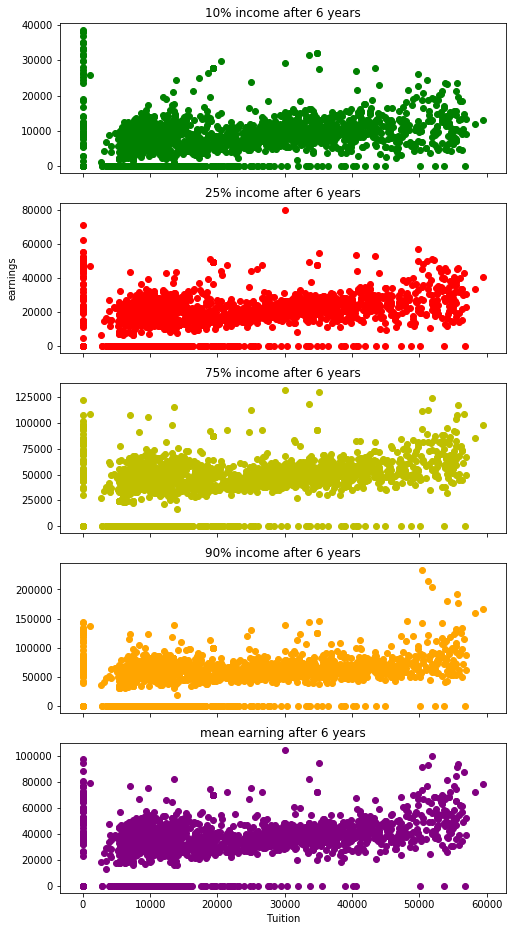

In [401]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, sharex = True, figsize=(8,16))
ax1.set_title("10% income after 6 years")
ax2.set_title("25% income after 6 years")
ax3.set_title("75% income after 6 years")
ax4.set_title("90% income after 6 years")
ax5.set_title("mean earning after 6 years")
ax5.set_xlabel("Tuition")
ax2.set_ylabel("earnings")
ax1.scatter(x,y1, color = 'g')

ax2.scatter(x,y2, color = 'r')

ax3.scatter(x,y3, color = 'y')

ax4.scatter(x,y4, color = 'orange')
ax5.scatter(x,y5, color = 'purple')

plt.show()

In [402]:
cost_clean_df.loc[cost_clean_df['PCT90_EARN_WNE_P6'].astype(int) > 150000, :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100
15,2413,Duke University,NC,55695.0,55695.0,19700,46000,117100,176900,93200
16,2992,University of Pennsylvania,PA,55584.0,55584.0,23500,45400,108000,191500,91200
50,621,Georgetown University,DC,54104.0,54104.0,23300,44200,95500,179900,81100
90,1508,Massachusetts Institute of Technology,MA,51832.0,51832.0,19400,50800,124100,203700,99600
96,3841,Stanford University,CA,51354.0,51354.0,18700,41600,112800,214600,92800
104,1492,Harvard University,MA,50420.0,50420.0,18800,45100,111300,233800,91300


In [403]:
cost_clean_df.loc[cost_clean_df['INSTNM'] == 'Smith College', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
81,1544,Smith College,MA,52404.0,52404.0,8900,18900,48700,63300,37400


In [404]:
cost_clean_df.describe()

,index,TUITIONFEE_IN,TUITIONFEE_OUT
count,2058.000000,2058.000000,2058.000000
mean,2507.677357,21140.330904,24318.506317
std,1567.057753,14867.713737,13712.741397
min,0.000000,0.000000,0.000000
25%,1267.250000,8979.500000,14604.500000
50%,2345.500000,16540.500000,22425.000000
75%,3467.750000,32007.500000,33283.500000
max,6322.000000,59430.000000,59430.000000


In [405]:
#PREDEG == 3 is the university is predominately a 4 year school.
filtered_4_year_df = filtered_df.loc[df['PREDDEG'] == 3, :]
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7619,0.4048,42.0


In [406]:
filtered_4_year_df = filtered_4_year_df.fillna(0)
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7619,0.4048,42.0


Begin random forest regession.

In [407]:
#try to predict median income.  Must drop all columns relating to income from data set.
#determine all column headings with earnings as the dev-category
column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', :]

,dev-category,VARIABLE NAME,developer-friendly name,API data type,NAME OF DATA ELEMENT,VALUE,LABEL,SOURCE,NOTES
377,earnings,PCT10_EARN_WNE_P10,10_yrs_after_entry.working_not_enrolled.earnin...,integer,10th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
378,earnings,PCT10_EARN_WNE_P6,6_yrs_after_entry.working_not_enrolled.earning...,integer,10th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
379,earnings,PCT10_EARN_WNE_P8,8_yrs_after_entry.10th_percentile_earnings,integer,10th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
380,earnings,PCT25_EARN_WNE_P10,10_yrs_after_entry.working_not_enrolled.earnin...,integer,25th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
381,earnings,PCT25_EARN_WNE_P6,6_yrs_after_entry.working_not_enrolled.earning...,integer,25th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
...,...,...,...,...,...,...,...,...,...
447,earnings,SD_EARN_WNE_P10,10_yrs_after_entry.working_not_enrolled.std_dev,integer,Standard deviation of earnings of students wor...,(blank),(blank),Treasury,(blank)
448,earnings,SD_EARN_WNE_P6,6_yrs_after_entry.working_not_enrolled.std_dev,integer,Standard deviation of earnings of students wor...,(blank),(blank),Treasury,(blank)
449,earnings,SD_EARN_WNE_P7,7_yrs_after_entry.std_dev,float,Standard deviation of earnings of students wor...,(blank),(blank),Treasury,(blank)
450,earnings,SD_EARN_WNE_P8,8_yrs_after_entry.std_deviation,float,Standard deviation of earnings of students wor...,(blank),(blank),Treasury,(blank)


In [408]:
#make a list of these variable names
earning_variable_name = column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', 'VARIABLE NAME'].to_list()
earning_variable_name

['PCT10_EARN_WNE_P10',
 'PCT10_EARN_WNE_P6',
 'PCT10_EARN_WNE_P8',
 'PCT25_EARN_WNE_P10',
 'PCT25_EARN_WNE_P6',
 'PCT25_EARN_WNE_P8',
 'PCT75_EARN_WNE_P10',
 'PCT75_EARN_WNE_P6',
 'PCT75_EARN_WNE_P8',
 'PCT90_EARN_WNE_P10',
 'PCT90_EARN_WNE_P6',
 'PCT90_EARN_WNE_P8',
 'MN_EARN_WNE_INDEP0_P10',
 'MN_EARN_WNE_INDEP0_INC1_P10',
 'MN_EARN_WNE_INDEP0_P6',
 'MN_EARN_WNE_INDEP0_INC1_P6',
 'MN_EARN_WNE_MALE0_P10',
 'MN_EARN_WNE_MALE0_P6',
 'MN_EARN_WNE_INDEP1_P10',
 'MN_EARN_WNE_INDEP1_P6',
 'MN_EARN_WNE_MALE1_P10',
 'MN_EARN_WNE_MALE1_P6',
 'MN_EARN_WNE_P10',
 'MN_EARN_WNE_INC3_P10',
 'MN_EARN_WNE_INC1_P10',
 'MN_EARN_WNE_INC2_P10',
 'MN_EARN_WNE_P6',
 'MN_EARN_WNE_INC3_P6',
 'MN_EARN_WNE_INC1_P6',
 'MN_EARN_WNE_INC2_P6',
 'MN_EARN_WNE_P7',
 'MN_EARN_WNE_P8',
 'MN_EARN_WNE_P9',
 'MD_EARN_WNE_P10',
 'MD_EARN_WNE_P6',
 'MD_EARN_WNE_P8',
 'COUNT_WNE_INDEP0_P10',
 'COUNT_WNE_INDEP0_INC1_P10',
 'COUNT_WNE_INDEP0_P6',
 'COUNT_WNE_INDEP0_INC1_P6',
 'COUNT_WNE_MALE0_P10',
 'COUNT_WNE_MALE0_P6',
 'COU

In [409]:
#need to drop all rows that have a 0
row_mean_0 = filtered_4_year_df.loc[filtered_4_year_df['MN_EARN_WNE_P6'] == 0, :].index
row_mean_0

Int64Index([  23,   44,   57,  193,  229,  231,  328,  338,  339,  398,
            ...
            6252, 6254, 6261, 6263, 6271, 6299, 6314, 6318, 6319, 6322],
           dtype='int64', length=232)

In [410]:
filtered_4_year_df = filtered_4_year_df.drop(index = row_mean_0)


In [411]:
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8824,0.9412,34.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9746,0.4915,118.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6975,0.1793,552.0


In [413]:
filtered_4_year_df.to_csv(path2+'filter_4_year_df.csv')

In [414]:
#filter 4 year file based on only main campus
filtered_4_year_main_df = filtered_4_year_df.loc[filtered_4_year_df['MAIN'] == 1, :]

In [415]:
filtered_4_year_main_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,482158,158100,1581,Middle Georgia State University,Macon,GA,31206,https://www.mga.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5732,0.5295,2317.0
5798,482477,1072700,10727,DeVry University-Illinois,Chicago,IL,60618,https://www.devry.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8607,0.913,517.0
5809,482680,158500,1585,University of North Georgia,Dahlonega,GA,30597,www.ung.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3319,0.3079,7300.0
5900,484613,2098800,20988,University of Phoenix-Arizona,Phoenix,AZ,85040,https://www.phoenix.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6981,0.7745,9022.0


In [502]:
filtered_4_year_main_df.to_csv(path2+'filter_4_year_main_df.csv')

In [416]:
filtered_4_year_column_list = filtered_4_year_df.columns.tolist()
filtered_4_year_column_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'INSTURL',
 'SCH_DEG',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52

In [417]:
#value for y is mean earning 6 years from enrollment
y = filtered_4_year_df['MN_EARN_WNE_P6']

In [418]:
from pandas.api.types import is_numeric_dtype

In [419]:
#for X we need to drop all columns that are earnings.  We have kept the one we care about as y.
for variable in earning_variable_name:
    if variable in filtered_4_year_column_list :
        filtered_4_year_df.drop(columns = variable, inplace = True)

In [420]:
y

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: object

In [421]:
#note the fewer columns.  All earnings categories were deleted.
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8824,0.9412,34.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9746,0.4915,118.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6975,0.1793,552.0


In [422]:
#need to drop all text based columns
filtered_4_year_df = filtered_4_year_df.drop(columns = ['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'INSTURL'])

In [423]:
#get list of remaining columns to determine which ones still contain some text
column_list = filtered_4_year_df.columns.to_list()

In [424]:
column_list

['SCH_DEG',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54',
 'CIP01BACHL',
 'CIP03BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP09BA

In [425]:
len(column_list)

519

In [426]:
filtered_4_year_df['VETERAN'].dtypes

dtype('O')

In [427]:
is_numeric_dtype(filtered_4_year_df['VETERAN'])

False

In [428]:
filtered_4_year_df['FEMALE'].dtypes

dtype('O')

In [429]:
for value in filtered_4_year_df['FEMALE']:
    print(value)

0.5640301318
0.6390907397
0.6486486486
0.4763499372
0.6134185304
0.6152524168
0.705078125
0.6929480901
0.531504671
0.520361991
0.7628668652
0.6387315968
0.4704142012
0.5886792453
0
0.5577586207
0.4668079096
0.6732804233
0.6827586207
0.6013931889
0.5860805861
0.6588785047
0.6229367631
0.6452599388
0.4610051993
0.4897540984
0.6510154346
0.6509505703
0.2394366197
0.5987699877
0.5940482875
0.6301369863
0.5568306611
0.5628539071
0.5445544554
0.1816434407
0.743284234
0.6385814497
0.6274509804
0.6956521739
0.2894736842
0.6464909992
0.8375
0.4325068871
0.5588193956
0.5960854093
0.6108749161
0.5661364132
0.6165561287
0.4609929078
0.3921568627
0.5682910089
0.5543415756
0.505952381
0.6155844156
0.4945054945
0.4859550562
0.6232439336
0.4346153846
0.5619419643
0.5636766334
0.5731981982
0.5523465704
0.7258883249
0.6677920324
0.7764705882
0.6606170599
0.6189189189
0.4565217391
0.6172284644
0.5029626253
0.6426605505
0.6771726535
0.6247122956
0.4947096457
0.5745917085
0.6572807723
0.6211972522
0.598007

0.6564477848
0.6008479288
0.5696517413
0.5453857791
0.6463891249
0.7620817844
0.8241106719
0.5565967941
0.5116777884
0.6641992791
0.5606045134
0.4620796156
0.5511453605
0.599025974
0.6027837259
0.3277962348
0.4844632768
0.607340372
0.5416743841
0.5913492576
0.4967522425
0.6058763931
0.9028707101
0.5405405405
0.8463035019
0.87001287
0.5776031434
0.6003377428
0.6262740657
0.4795278495
0.6020558003
0.5524714829
0.7420641516
0.5495908753
0.47188775
0.5055296857
0.609394314
0.671875
0.5093411996
0.4702731655
0.821192053
0.5862068966
0.6636597938
0.6037735849
0.53432282
0.4944444444
0.2662429379
0.6151515152
0.5319148936
0.5945945946
0.6542056075
0.6014972646
0.5265760198
0.5660091047
0.5239043825
0.6071726439
0.653869969
0.5952380952
0.8309859155
0.4874100719
0.6357142857
0.3958785249
0.557201846
0
0.6915351506
0
0.6132253203
0.6439648587
0.6877637131
0.6171548117
0.9311258278
0.6853146853
0.7027559055
0.9133574007
0.6717408275
0.6019766397
0.5950139914
0.546191248
0.7146892655
0.90625
0.54

In [430]:
i=0
for row in column_list:
    i=i+1
    not_numeric = not is_numeric_dtype(filtered_4_year_df[row])
    if not_numeric:
        print(i, row)

248 WDRAW_ORIG_YR2_RT
249 LO_INC_DEATH_YR4_RT
250 LO_INC_COMP_ORIG_YR4_RT
251 LO_INC_COMP_4YR_TRANS_YR4_RT
252 LO_INC_COMP_2YR_TRANS_YR4_RT
253 LO_INC_WDRAW_ORIG_YR4_RT
254 LO_INC_WDRAW_4YR_TRANS_YR4_RT
255 LO_INC_WDRAW_2YR_TRANS_YR4_RT
256 LO_INC_ENRL_ORIG_YR4_RT
257 LO_INC_ENRL_4YR_TRANS_YR4_RT
258 LO_INC_ENRL_2YR_TRANS_YR4_RT
259 LO_INC_UNKN_ORIG_YR4_RT
260 LO_INC_UNKN_4YR_TRANS_YR4_RT
261 LO_INC_UNKN_2YR_TRANS_YR4_RT
262 MD_INC_DEATH_YR4_RT
263 MD_INC_COMP_ORIG_YR4_RT
264 MD_INC_COMP_4YR_TRANS_YR4_RT
265 MD_INC_COMP_2YR_TRANS_YR4_RT
266 MD_INC_WDRAW_ORIG_YR4_RT
267 MD_INC_WDRAW_4YR_TRANS_YR4_RT
268 MD_INC_WDRAW_2YR_TRANS_YR4_RT
269 MD_INC_ENRL_ORIG_YR4_RT
270 MD_INC_ENRL_4YR_TRANS_YR4_RT
271 MD_INC_ENRL_2YR_TRANS_YR4_RT
272 MD_INC_UNKN_ORIG_YR4_RT
273 MD_INC_UNKN_4YR_TRANS_YR4_RT
275 HI_INC_DEATH_YR4_RT
276 HI_INC_COMP_ORIG_YR4_RT
277 HI_INC_COMP_4YR_TRANS_YR4_RT
278 HI_INC_COMP_2YR_TRANS_YR4_RT
279 HI_INC_WDRAW_ORIG_YR4_RT
280 HI_INC_WDRAW_4YR_TRANS_YR4_RT
281 HI_INC_WDRAW_2YR_TRA

In [431]:
filtered_4_year_df.replace(to_replace = 'Dental Hygiene/Hygienist', value = 0, inplace = True)

In [432]:
X = filtered_4_year_df

In [433]:
print(X.shape, y.shape)

(1826, 519) (1826,)


In [434]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [435]:
# random forest generator classifier
from sklearn.ensemble import RandomForestRegressor


In [436]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.785826808500573

In [437]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([6.42503469e-06, 5.30069594e-06, 8.26755979e-05, 0.00000000e+00,
       2.37582409e-03, 6.58913069e-04, 7.19774181e-04, 1.93277720e-04,
       0.00000000e+00, 7.30597448e-04, 1.88245029e-03, 3.40687188e-03,
       6.72354761e-04, 3.98409856e-04, 1.14092744e-07, 1.10334434e-05,
       1.22899721e-03, 7.23582360e-03, 5.76335278e-04, 5.64281141e-04,
       2.92499891e-03, 3.51378398e-04, 1.16634545e-03, 3.91184623e-04,
       3.58449555e-04, 2.17927759e-03, 3.29170090e-04, 7.26647524e-04,
       6.37127219e-04, 1.00869587e-04, 5.21068194e-04, 1.19416075e-03,
       1.51614781e-03, 3.73553961e-05, 5.63110868e-05, 5.11640227e-04,
       3.84105028e-04, 4.78366510e-04, 2.48890892e-05, 1.01939635e-03,
       3.59147037e-03, 1.41660550e-04, 5.58510557e-04, 6.45642366e-05,
       3.42103232e-04, 5.58925534e-04, 4.28762882e-05, 1.92154877e-03,
       5.86922612e-06, 3.77247728e-03, 6.29293906e-03, 2.13150212e-04,
       1.04282163e-03, 8.20494467e-05, 4.00797483e-05, 1.55609607e-03,
      

In [438]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, column_list), reverse=True)

[(0.10896012319425902, 'WDRAW_ORIG_YR2_RT'),
 (0.10004651291895644, 'RPY_3YR_RT'),
 (0.05535432884523279, 'FAMINC_IND'),
 (0.04205721445873545, 'UGDS_ASIAN'),
 (0.03650950451264443, 'LO_INC_RPY_1YR_RT'),
 (0.03108721595579369, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.028839031590918864, 'PCIP51'),
 (0.028556994133099294, 'AVGFACSAL'),
 (0.028317694015348605, 'RPY_1YR_RT'),
 (0.015011005324310154, 'INEXPFTE'),
 (0.014539456128805719, 'PCIP50'),
 (0.013110708756450604, 'TUITFTE'),
 (0.012794295662521514, 'IND_RPY_3YR_RT'),
 (0.012648274160984456, 'FIRSTGEN_RPY_7YR_RT'),
 (0.011671834783460565, 'IND_RPY_7YR_RT'),
 (0.009955470525200075, 'IND_RPY_5YR_RT'),
 (0.009706511260909892, 'NOTFIRSTGEN_RPY_1YR_RT'),
 (0.009650838859028123, 'HI_INC_RPY_3YR_RT'),
 (0.009380316789358719, 'DEP_RPY_3YR_RT'),
 (0.008741510877694142, 'UGDS_WHITE'),
 (0.008740523217474013, 'FIRSTGEN_RPY_3YR_RT'),
 (0.007592580250020646, 'AGEGE24'),
 (0.007235823603169966, 'ADM_RATE_ALL'),
 (0.007076420088534997, 'MALE_RPY_3YR_RT'),


In [439]:
#OK the repayment success is related to average income.  Makes sense.  If you have money you will repay. All repayment
#columns should be dropped.
repayment_var = column_heading_df.loc[column_heading_df['dev-category'] == 'repayment', 'VARIABLE NAME'].to_list()
repayment_var

['LO_INC_RPY_5YR_RT',
 'MD_INC_RPY_5YR_RT',
 'HI_INC_RPY_5YR_RT',
 'COMPL_RPY_5YR_RT',
 'DEP_RPY_5YR_RT',
 'FEMALE_RPY_5YR_RT',
 'FIRSTGEN_RPY_5YR_RT',
 'IND_RPY_5YR_RT',
 'MALE_RPY_5YR_RT',
 'NONCOM_RPY_5YR_RT',
 'NOTFIRSTGEN_RPY_5YR_RT',
 'NOPELL_RPY_5YR_RT',
 'PELL_RPY_5YR_RT',
 'RPY_5YR_RT',
 'RPY_1YR_RT',
 'RPY_7YR_RT',
 'RPY_3YR_RT',
 'LO_INC_RPY_1YR_RT',
 'MD_INC_RPY_1YR_RT',
 'HI_INC_RPY_1YR_RT',
 'COMPL_RPY_1YR_RT',
 'DEP_RPY_1YR_RT',
 'FEMALE_RPY_1YR_RT',
 'FIRSTGEN_RPY_1YR_RT',
 'IND_RPY_1YR_RT',
 'MALE_RPY_1YR_RT',
 'NONCOM_RPY_1YR_RT',
 'NOTFIRSTGEN_RPY_1YR_RT',
 'NOPELL_RPY_1YR_RT',
 'PELL_RPY_1YR_RT',
 'LO_INC_RPY_7YR_RT',
 'MD_INC_RPY_7YR_RT',
 'HI_INC_RPY_7YR_RT',
 'COMPL_RPY_7YR_RT',
 'DEP_RPY_7YR_RT',
 'FEMALE_RPY_7YR_RT',
 'FIRSTGEN_RPY_7YR_RT',
 'IND_RPY_7YR_RT',
 'MALE_RPY_7YR_RT',
 'NONCOM_RPY_7YR_RT',
 'NOTFIRSTGEN_RPY_7YR_RT',
 'NOPELL_RPY_7YR_RT',
 'PELL_RPY_7YR_RT',
 'LO_INC_RPY_3YR_RT',
 'MD_INC_RPY_3YR_RT',
 'HI_INC_RPY_3YR_RT',
 'COMPL_RPY_3YR_RT',
 'DEP_R

In [440]:
#the a means rev a after the first run of the data.
filtered_4_year_a_df = filtered_4_year_df.copy()
for column_name in repayment_var:
    filtered_4_year_a_df.drop(columns = column_name, inplace = True)

In [441]:
filtered_4_year_a_df

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,3.0,1,1,3,1,1,5,12.0,0.0,34.783368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,3.0,1,1,3,1,1,5,12.0,0.0,33.505697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,3.0,1,1,3,2,1,5,12.0,0.0,32.362609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,3.0,1,1,3,1,1,5,12.0,0.0,34.724557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,3.0,1,1,3,1,1,5,12.0,0.0,32.364317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,3.0,0,19,3,3,51,5,21.0,0.0,37.642570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
5912,3.0,0,19,3,3,42,2,11.0,0.0,39.952190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8824,0.9412,34.0
5914,2.0,0,4,3,3,72,9,13.0,0.0,18.199097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9746,0.4915,118.0
5918,3.0,1,1,3,1,48,6,11.0,0.0,32.659588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6975,0.1793,552.0


In [442]:
X = filtered_4_year_a_df

In [443]:
column_list_a = filtered_4_year_a_df.columns.to_list()

In [444]:
print(X.shape, y.shape)

(1826, 463) (1826,)


In [445]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [446]:
rfa = rf.fit(X_train, y_train)
rfa.score(X_test, y_test)

0.8145040453580026

In [447]:
# Random Forests in sklearn will automatically calculate feature importance
importancesa = rfa.feature_importances_
importancesa

array([1.76993869e-05, 1.31143454e-06, 1.57079149e-04, 0.00000000e+00,
       3.78611527e-04, 7.69791877e-04, 5.10953773e-04, 5.68153056e-04,
       0.00000000e+00, 1.62006040e-03, 2.90860222e-03, 3.67010344e-03,
       3.86149602e-04, 1.25700839e-03, 4.47043851e-06, 3.70245291e-05,
       1.30369906e-03, 5.57309663e-03, 5.08452582e-04, 4.80316162e-04,
       7.87067469e-03, 9.70902643e-04, 1.09788734e-04, 7.00635099e-04,
       4.76656268e-04, 3.45262200e-03, 2.70486241e-04, 4.41858184e-04,
       2.17134094e-04, 5.94751234e-04, 1.04294594e-04, 6.54513735e-04,
       6.43136524e-04, 3.44293098e-05, 3.76007518e-05, 2.32049601e-04,
       4.17749969e-04, 6.50977360e-04, 4.46528521e-05, 8.45609488e-04,
       2.60039785e-03, 3.81074968e-05, 4.91272986e-04, 3.06857850e-04,
       3.79858091e-04, 1.67093371e-03, 1.50324841e-04, 4.90705153e-03,
       2.36557120e-05, 2.17383535e-03, 1.47736963e-02, 4.80503027e-04,
       5.30362775e-04, 8.34708057e-05, 1.33671505e-04, 2.28057369e-03,
      

In [448]:
# We can sort the features by their importance
importance_list_a = sorted(zip(rfa.feature_importances_, column_list_a), reverse=True)
importance_list_a

[(0.2031081841241317, 'WDRAW_ORIG_YR2_RT'),
 (0.0739528820695256, 'FAMINC_IND'),
 (0.07078395548395175, 'UGDS_ASIAN'),
 (0.06843066239399649, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.054697105338581735, 'AVGFACSAL'),
 (0.04441790578627753, 'PCIP51'),
 (0.02302275642970295, 'TUITFTE'),
 (0.022558606377061197, 'INEXPFTE'),
 (0.022113461775327737, 'PCIP50'),
 (0.020387547879524726, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.01477369627504247, 'PCIP14'),
 (0.014139985205165595, 'HI_INC_DEBT_N'),
 (0.012668495069410127, 'HI_INC_YR4_N'),
 (0.00825754424768127, 'NOPELL_YR6_N'),
 (0.00787067468670395, 'SATMT25'),
 (0.006739310308093081, 'UGDS_WHITE'),
 (0.0055730966285900295, 'ADM_RATE_ALL'),
 (0.0055538684050579976, 'LO_INC_COMP_ORIG_YR6_RT'),
 (0.005324546552303837, 'PELL_EVER'),
 (0.005189246680517984, 'MARRIED'),
 (0.004975854733409485, 'FIRSTGEN_DEBT_N'),
 (0.0049070515325348955, 'PCIP11'),
 (0.00490381810839882, 'UGDS_HISP'),
 (0.004903255995704659, 'FEMALE'),
 (0.00488534271141529, 'NOPELL_DEBT_N'),
 (0.00

In [449]:
a_drop_list = []
for tuple in importance_list_a:
    if tuple[0] < 0.0001:
        a_drop_list.append(tuple[1]) 
    print(tuple)

(0.2031081841241317, 'WDRAW_ORIG_YR2_RT')
(0.0739528820695256, 'FAMINC_IND')
(0.07078395548395175, 'UGDS_ASIAN')
(0.06843066239399649, 'FTFTPCTPELL_POOLED_SUPP')
(0.054697105338581735, 'AVGFACSAL')
(0.04441790578627753, 'PCIP51')
(0.02302275642970295, 'TUITFTE')
(0.022558606377061197, 'INEXPFTE')
(0.022113461775327737, 'PCIP50')
(0.020387547879524726, 'LO_INC_COMP_ORIG_YR4_RT')
(0.01477369627504247, 'PCIP14')
(0.014139985205165595, 'HI_INC_DEBT_N')
(0.012668495069410127, 'HI_INC_YR4_N')
(0.00825754424768127, 'NOPELL_YR6_N')
(0.00787067468670395, 'SATMT25')
(0.006739310308093081, 'UGDS_WHITE')
(0.0055730966285900295, 'ADM_RATE_ALL')
(0.0055538684050579976, 'LO_INC_COMP_ORIG_YR6_RT')
(0.005324546552303837, 'PELL_EVER')
(0.005189246680517984, 'MARRIED')
(0.004975854733409485, 'FIRSTGEN_DEBT_N')
(0.0049070515325348955, 'PCIP11')
(0.00490381810839882, 'UGDS_HISP')
(0.004903255995704659, 'FEMALE')
(0.00488534271141529, 'NOPELL_DEBT_N')
(0.004744764029657418, 'C150_4_WHITE')
(0.00451805935637

In [450]:
a_drop_list

['MD_INC_ENRL_2YR_TRANS_YR4_RT',
 'CIP54BACHL',
 'NUM43_PUB',
 'MD_INC_ENRL_ORIG_YR6_RT',
 'CIP40BACHL',
 'HI_INC_COMP_2YR_TRANS_YR6_RT',
 'DISTANCEONLY',
 'PCIP19',
 'NPT4_048_PUB',
 'LO_INC_ENRL_ORIG_YR6_RT',
 'NUM42_PUB',
 'NUM44_PUB',
 'CIP04BACHL',
 'CIP03BACHL',
 'NUM4_PUB',
 'MD_INC_UNKN_ORIG_YR6_RT',
 'CIP27BACHL',
 'CIP16BACHL',
 'LO_INC_UNKN_ORIG_YR6_RT',
 'NPT41_PUB',
 'CIP19BACHL',
 'CIP39BACHL',
 'CIP43BACHL',
 'LO_INC_DEATH_YR6_RT',
 'NPT43_PUB',
 'ACTWRMID',
 'LO_INC_ENRL_2YR_TRANS_YR6_RT',
 'CIP10BACHL',
 'PCIP01',
 'NPT4_75UP_PUB',
 'ACTWR75',
 'WOMENONLY',
 'CIP49BACHL',
 'HI_INC_UNKN_ORIG_YR4_RT',
 'ACTWR25',
 'NUM41_PUB',
 'CURROPER',
 'LO_INC_DEATH_YR4_RT',
 'HI_INC_ENRL_2YR_TRANS_YR6_RT',
 'NPT45_PUB',
 'HI_INC_ENRL_ORIG_YR6_RT',
 'HI_INC_ENRL_2YR_TRANS_YR4_RT',
 'PCIP12',
 'CIP05BACHL',
 'SCH_DEG',
 'LO_INC_UNKN_ORIG_YR4_RT',
 'CIP14BACHL',
 'PCIP29',
 'PRGMOFR',
 'PCIP48',
 'CIP29BACHL',
 'MD_INC_UNKN_ORIG_YR4_RT',
 'MD_INC_DEATH_YR6_RT',
 'CIP12BACHL',
 'HI_INC

In [451]:
#the a means rev b after the first run of the data.
filtered_4_year_b_df = filtered_4_year_a_df.copy()
for column_name in a_drop_list:
    filtered_4_year_b_df.drop(columns = column_name, inplace = True)

In [452]:
filtered_4_year_b_df

,NUMBRANCH,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,...,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,SCHTYPE,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,1,1,1,5,12.0,34.783368,-86.568502,18.0,10.0,14.0,...,14.8800001144409,4.84000015258789,10.75,15000,34500,358.051635276573,1.0,0.7083,0.7287,2698.0
1,1,1,1,5,12.0,33.505697,-86.799345,15.0,9.0,15.0,...,10.9099998474121,3.45000004768371,10.8599996566772,15000,22500,233.511936049938,1.0,0.3891,0.5414,4176.0
2,1,2,1,5,12.0,32.362609,-86.174010,20.0,5.0,6.0,...,10.6499996185302,3.59999990463256,10.8400001525878,13207,25002,259.478463338692,2.0,0,0,24.0
3,1,1,1,5,12.0,34.724557,-86.640449,16.0,15.0,12.0,...,9.36999988555908,3.64000010490417,10.9300003051757,14000,22021,228.540726389142,1.0,0.2378,0.4402,2544.0
4,1,1,1,5,12.0,32.364317,-86.295677,19.0,10.0,14.0,...,16.9599990844726,4.80999994277954,10.6700000762939,18950,32637,338.716846971638,1.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,19,3,51,5,21.0,37.642570,-77.563516,20.0,11.0,6.0,...,0,0,0,18500,32813,340.543429226962,0.0,0,0,5.0
5912,19,3,42,2,11.0,39.952190,-75.169354,22.0,11.0,6.0,...,0,0,0,18500,32813,340.543429226962,3.0,0.8824,0.9412,34.0
5914,4,3,72,9,13.0,18.199097,-67.146379,26.0,11.0,6.0,...,0,0,0,3667,4225,43.848352436044,3.0,0.9746,0.4915,118.0
5918,1,1,48,6,11.0,32.659588,-96.803446,19.0,7.0,9.0,...,0,0,0,10868,12500,129.728853361077,1.0,0.6975,0.1793,552.0


In [453]:
X = filtered_4_year_b_df

In [454]:
column_list_b = filtered_4_year_b_df.columns.to_list()

In [455]:
print(X.shape, y.shape)

(1826, 272) (1826,)


In [456]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [457]:
rfb = RandomForestRegressor()
rfb = rf.fit(X_train, y_train)
rfb.score(X_test, y_test)

0.8169762677375031

In [458]:
# We can sort the features by their importance
importance_list_b = sorted(zip(rfb.feature_importances_, column_list_b), reverse=True)
importance_list_b

[(0.22316022182795892, 'WDRAW_ORIG_YR2_RT'),
 (0.07859845812905117, 'FAMINC_IND'),
 (0.062019106384454646, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.05455649857558086, 'UGDS_ASIAN'),
 (0.05258317356580061, 'AVGFACSAL'),
 (0.048201666662467064, 'PCIP51'),
 (0.02895298072886724, 'INEXPFTE'),
 (0.023658453727692107, 'PCIP50'),
 (0.022626567470113972, 'TUITFTE'),
 (0.019892122832822056, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.014137980669395492, 'HI_INC_YR4_N'),
 (0.014077264648944845, 'PCIP14'),
 (0.01042524740777401, 'HI_INC_DEBT_N'),
 (0.007932667648316833, 'NOPELL_DEBT_N'),
 (0.00619529123710798, 'HI_INC_COMP_ORIG_YR6_RT'),
 (0.006103805273181659, 'MARRIED'),
 (0.0055687750952389415, 'UGDS_WHITE'),
 (0.00545293254311492, 'LO_INC_COMP_ORIG_YR6_RT'),
 (0.005195235468491536, 'FAMINC'),
 (0.004883052902751845, 'FEMALE'),
 (0.004855018781392454, 'UGDS_HISP'),
 (0.00461519300373316, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.004587719379067597, 'INC_PCT_M2'),
 (0.00449942343805992, 'PELL_EVER'),
 (0.004454713264808371,

In [459]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
b_drop_list = []
for tuple in importance_list_b:
    if tuple[0] < 0.001:
        b_drop_list.append(tuple[1]) 
    print(tuple)

(0.22316022182795892, 'WDRAW_ORIG_YR2_RT')
(0.07859845812905117, 'FAMINC_IND')
(0.062019106384454646, 'FTFTPCTPELL_POOLED_SUPP')
(0.05455649857558086, 'UGDS_ASIAN')
(0.05258317356580061, 'AVGFACSAL')
(0.048201666662467064, 'PCIP51')
(0.02895298072886724, 'INEXPFTE')
(0.023658453727692107, 'PCIP50')
(0.022626567470113972, 'TUITFTE')
(0.019892122832822056, 'LO_INC_COMP_ORIG_YR4_RT')
(0.014137980669395492, 'HI_INC_YR4_N')
(0.014077264648944845, 'PCIP14')
(0.01042524740777401, 'HI_INC_DEBT_N')
(0.007932667648316833, 'NOPELL_DEBT_N')
(0.00619529123710798, 'HI_INC_COMP_ORIG_YR6_RT')
(0.006103805273181659, 'MARRIED')
(0.0055687750952389415, 'UGDS_WHITE')
(0.00545293254311492, 'LO_INC_COMP_ORIG_YR6_RT')
(0.005195235468491536, 'FAMINC')
(0.004883052902751845, 'FEMALE')
(0.004855018781392454, 'UGDS_HISP')
(0.00461519300373316, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.004587719379067597, 'INC_PCT_M2')
(0.00449942343805992, 'PELL_EVER')
(0.004454713264808371, 'SAT_AVG_ALL')
(0.004346438581230928, 'PCIP52')


In [460]:
#the a means rev c after the first run of the data.
filtered_4_year_c_df = filtered_4_year_b_df.copy()
for column_name in b_drop_list:
    filtered_4_year_c_df.drop(columns = column_name, inplace = True)

In [461]:
X = filtered_4_year_c_df

In [462]:
column_list_c = filtered_4_year_c_df.columns.to_list()

In [463]:
print(X.shape, y.shape)

(1826, 132) (1826,)


In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [465]:
rfc = rf.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.824343305976683

In [466]:
# We can sort the features by their importance
importance_list_c = sorted(zip(rfc.feature_importances_, column_list_c), reverse=True)
importance_list_c

[(0.2068473315201327, 'WDRAW_ORIG_YR2_RT'),
 (0.07408641905339262, 'FAMINC_IND'),
 (0.06475316408846714, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.06463668900358556, 'UGDS_ASIAN'),
 (0.0607578290134473, 'AVGFACSAL'),
 (0.04898431129985528, 'PCIP51'),
 (0.03482621248655995, 'INEXPFTE'),
 (0.028341754799992482, 'PCIP50'),
 (0.026004037391279048, 'TUITFTE'),
 (0.016955115462874776, 'PCIP14'),
 (0.016882349850036275, 'HI_INC_YR4_N'),
 (0.014675186907885359, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.00828200952418477, 'HI_INC_DEBT_N'),
 (0.007820793426326486, 'NOPELL_YR6_N'),
 (0.0072825752785818315, 'C150_4_WHITE'),
 (0.006537974174521349, 'PELL_EVER'),
 (0.006318212849429447, 'INC_PCT_M2'),
 (0.006269048660737565, 'SAT_AVG_ALL'),
 (0.006141927803654625, 'FEMALE'),
 (0.0060406761265300365, 'NOPELL_DEBT_N'),
 (0.005640471520348285, 'SATMTMID'),
 (0.0056339356572941805, 'PCIP52'),
 (0.005304114967344259, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.005218253894592548, 'HI_INC_COMP_ORIG_YR6_RT'),
 (0.005193853108800485, 'FI

In [467]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
c_drop_list = []
for tuple in importance_list_c:
    if tuple[0] < 0.005:
        c_drop_list.append(tuple[1]) 
    print(tuple)

(0.2068473315201327, 'WDRAW_ORIG_YR2_RT')
(0.07408641905339262, 'FAMINC_IND')
(0.06475316408846714, 'FTFTPCTPELL_POOLED_SUPP')
(0.06463668900358556, 'UGDS_ASIAN')
(0.0607578290134473, 'AVGFACSAL')
(0.04898431129985528, 'PCIP51')
(0.03482621248655995, 'INEXPFTE')
(0.028341754799992482, 'PCIP50')
(0.026004037391279048, 'TUITFTE')
(0.016955115462874776, 'PCIP14')
(0.016882349850036275, 'HI_INC_YR4_N')
(0.014675186907885359, 'LO_INC_COMP_ORIG_YR4_RT')
(0.00828200952418477, 'HI_INC_DEBT_N')
(0.007820793426326486, 'NOPELL_YR6_N')
(0.0072825752785818315, 'C150_4_WHITE')
(0.006537974174521349, 'PELL_EVER')
(0.006318212849429447, 'INC_PCT_M2')
(0.006269048660737565, 'SAT_AVG_ALL')
(0.006141927803654625, 'FEMALE')
(0.0060406761265300365, 'NOPELL_DEBT_N')
(0.005640471520348285, 'SATMTMID')
(0.0056339356572941805, 'PCIP52')
(0.005304114967344259, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.005218253894592548, 'HI_INC_COMP_ORIG_YR6_RT')
(0.005193853108800485, 'FIRSTGEN_DEBT_N')
(0.005066787398608397, 'ADM_RATE_

In [468]:
#the a means rev d after the first run of the data.
filtered_4_year_d_df = filtered_4_year_c_df.copy()
for column_name in c_drop_list:
    filtered_4_year_d_df.drop(columns = column_name, inplace = True)

In [469]:
X = filtered_4_year_d_df

In [470]:
column_list_d = filtered_4_year_d_df.columns.to_list()

In [471]:
print(X.shape, y.shape)

(1826, 26) (1826,)


In [472]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [473]:
rfd = rf.fit(X_train, y_train)
base_prediction  = rfd.score(X_test, y_test)

In [474]:
# We can sort the features by their importance
importance_list_d = sorted(zip(rfd.feature_importances_, column_list_d), reverse=True)
importance_list_d

[(0.2318162738333952, 'WDRAW_ORIG_YR2_RT'),
 (0.09499821989117302, 'FAMINC_IND'),
 (0.09044736877125867, 'AVGFACSAL'),
 (0.07179269352885988, 'UGDS_ASIAN'),
 (0.05848805556718271, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.05792422899819679, 'PCIP51'),
 (0.04350875179071449, 'INEXPFTE'),
 (0.04172469040017289, 'TUITFTE'),
 (0.038981711063490604, 'PCIP50'),
 (0.02289331249357902, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.022390108868575228, 'PCIP14'),
 (0.020332423790824124, 'NOPELL_DEBT_N'),
 (0.018181247181379635, 'FIRSTGEN_DEBT_N'),
 (0.01776344833091057, 'PELL_EVER'),
 (0.017726539410404252, 'HI_INC_DEBT_N'),
 (0.017676977601523224, 'FEMALE'),
 (0.016829682542909445, 'HI_INC_YR4_N'),
 (0.015587500693962017, 'PCIP52'),
 (0.014460674048829099, 'INC_PCT_M2'),
 (0.014219646013692366, 'NOPELL_YR6_N'),
 (0.01360163489143597, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.013070741185996463, 'SATMTMID'),
 (0.012924868029537854, 'C150_4_WHITE'),
 (0.011877895477589703, 'SAT_AVG_ALL'),
 (0.011072040278130389, 'HI_INC_COMP_ORI

In [475]:
column_heading_df

,dev-category,VARIABLE NAME,developer-friendly name,API data type,NAME OF DATA ELEMENT,VALUE,LABEL,SOURCE,NOTES
0,academics,MTHCMP1,program_reporter.program_1.cip_6_digit.avg_mon...,integer,Average number of months needed to complete la...,(blank),(blank),IPEDS,(blank)
1,academics,MTHCMP2,program_reporter.program_2.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
2,academics,MTHCMP3,program_reporter.program_3.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
3,academics,MTHCMP4,program_reporter.program_4.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
4,academics,MTHCMP5,program_reporter.program_5.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
...,...,...,...,...,...,...,...,...,...
597,student,UG_HISPOLD,demographics.race_ethnicity.hispanic_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
598,student,UG_NRA,demographics.non_resident_aliens_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
599,student,UG_WHITENH,demographics.race_ethnicity.white_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
600,student,UG_UNKN,demographics.race_ethnicity.unknown_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...


In [476]:
random_forest_summary_df = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [477]:
variable_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]

In [478]:
for tuple in importance_list_d:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df = random_forest_summary_df.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.2318162738333952
WDRAW_ORIG_YR2_RT
0.09499821989117302
FAMINC_IND
0.09044736877125867
AVGFACSAL
0.07179269352885988
UGDS_ASIAN
0.05848805556718271
FTFTPCTPELL_POOLED_SUPP
0.05792422899819679
PCIP51
0.04350875179071449
INEXPFTE
0.04172469040017289
TUITFTE
0.038981711063490604
PCIP50
0.02289331249357902
LO_INC_COMP_ORIG_YR4_RT
0.022390108868575228
PCIP14
0.020332423790824124
NOPELL_DEBT_N
0.018181247181379635
FIRSTGEN_DEBT_N
0.01776344833091057
PELL_EVER
0.017726539410404252
HI_INC_DEBT_N
0.017676977601523224
FEMALE
0.016829682542909445
HI_INC_YR4_N
0.015587500693962017
PCIP52
0.014460674048829099
INC_PCT_M2
0.014219646013692366
NOPELL_YR6_N
0.01360163489143597
FTFTPCTFLOAN_POOLED_SUPP
0.013070741185996463
SATMTMID
0.012924868029537854
C150_4_WHITE
0.011877895477589703
SAT_AVG_ALL
0.011072040278130389
HI_INC_COMP_ORIG_YR6_RT
0.00970926531627646
ADM_RATE_ALL


In [479]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.231816,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,FAMINC_IND,0.094998,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object"
2,AVGFACSAL,0.090447,faculty_salary,513 Average faculty salary Name: NAME OF DA...,"513 school Name: dev-category, dtype: object"
3,UGDS_ASIAN,0.071793,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
4,FTFTPCTPELL_POOLED_SUPP,0.058488,ftft_pell_grant_rate_pooled,"131 Percentage of full-time, first-time deg...","131 aid Name: dev-category, dtype: object"
5,PCIP51,0.057924,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
6,INEXPFTE,0.043509,instructional_expenditure_per_fte,528 Instructional expenditures per full-tim...,"528 school Name: dev-category, dtype: object"
7,TUITFTE,0.041725,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
8,PCIP50,0.038982,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
9,LO_INC_COMP_ORIG_YR4_RT,0.022893,title_iv.low_inc.completed_by.4yrs,"247 Percent of low-income (less than $30,00...","247 completion Name: dev-category, dtype: o..."


In [480]:
random_forest_summary_df['when_dropped'] = 0
random_forest_summary_df['base_prediction_score'] = base_prediction
random_forest_summary_df['difference'] = 0

In [481]:
filtered_4_year_e_df = filtered_4_year_d_df.copy()
for importance_variable in random_forest_summary_df.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_e_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping AVGFACSAL
dropping FTFTPCTPELL_POOLED_SUPP
dropping INEXPFTE
dropping LO_INC_COMP_ORIG_YR4_RT
dropping NOPELL_DEBT_N
dropping FIRSTGEN_DEBT_N
dropping PELL_EVER
dropping FEMALE
dropping HI_INC_YR4_N
dropping INC_PCT_M2
dropping NOPELL_YR6_N
dropping FTFTPCTFLOAN_POOLED_SUPP
dropping SATMTMID
dropping C150_4_WHITE
dropping SAT_AVG_ALL


In [482]:
filtered_4_year_e_df

,ADM_RATE_ALL,PCIP14,PCIP50,PCIP51,PCIP52,UGDS_ASIAN,TUITFTE,WDRAW_ORIG_YR2_RT,HI_INC_COMP_ORIG_YR6_RT,HI_INC_DEBT_N,FAMINC_IND
0,0.8986,0.1183,0.0237,0.0000,0.1578,0.0018,7413.0,0.300658376006,0.434482758621,342,10340.346032
1,0.9211,0.0813,0.0339,0.2255,0.1908,0.0633,13177.0,0.189010989011,0.536945812808,2029,30607.18029
2,0.0000,0.0000,0.0000,0.0000,0.4615,0.0057,14273.0,0.533333333333,0,29,20596.158491
3,0.8087,0.2892,0.0380,0.1543,0.2108,0.0381,8677.0,0.177021276596,0.553505535055,908,27941.821963
4,0.9774,0.0000,0.0585,0.1677,0.1062,0.0041,10160.0,0.33203125,0.436170212766,338,8551.802974
...,...,...,...,...,...,...,...,...,...,...,...
5911,0.0000,0.0000,0.0000,0.0471,0.6000,0.0400,9888.0,0.489800804444,0.449232778322,8519,25072.260178
5912,0.0000,0.0000,0.0000,0.3455,0.2000,0.0000,7952.0,0.489800804444,0.449232778322,8519,25072.260178
5914,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,4583.0,0.245901639344,0,0,4641.7923567
5918,0.8311,0.0000,0.0000,0.0139,0.2661,0.0190,7012.0,0,0,113,26508.601361


In [483]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category,when_dropped,base_prediction_score,difference
0,WDRAW_ORIG_YR2_RT,0.231816,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o...",0.817322,0.818492,0.001170
1,FAMINC_IND,0.094998,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object",0.814379,0.818492,0.004113
2,AVGFACSAL,0.090447,faculty_salary,513 Average faculty salary Name: NAME OF DA...,"513 school Name: dev-category, dtype: object",0.833477,0.818492,-0.014984
3,UGDS_ASIAN,0.071793,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object",0.811023,0.818492,0.007469
4,FTFTPCTPELL_POOLED_SUPP,0.058488,ftft_pell_grant_rate_pooled,"131 Percentage of full-time, first-time deg...","131 aid Name: dev-category, dtype: object",0.822879,0.818492,-0.004387
5,PCIP51,0.057924,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object",0.801738,0.818492,0.016755
6,INEXPFTE,0.043509,instructional_expenditure_per_fte,528 Instructional expenditures per full-tim...,"528 school Name: dev-category, dtype: object",0.820057,0.818492,-0.001565
7,TUITFTE,0.041725,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object",0.802028,0.818492,0.016464
8,PCIP50,0.038982,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object",0.798934,0.818492,0.019558
9,LO_INC_COMP_ORIG_YR4_RT,0.022893,title_iv.low_inc.completed_by.4yrs,"247 Percent of low-income (less than $30,00...","247 completion Name: dev-category, dtype: o...",0.822752,0.818492,-0.004260


In [484]:
column_list_e = filtered_4_year_e_df.columns.to_list()


In [485]:
column_list_e

['ADM_RATE_ALL',
 'PCIP14',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'UGDS_ASIAN',
 'TUITFTE',
 'WDRAW_ORIG_YR2_RT',
 'HI_INC_COMP_ORIG_YR6_RT',
 'HI_INC_DEBT_N',
 'FAMINC_IND']

In [486]:
X = filtered_4_year_e_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfe = rf.fit(X_train, y_train)
new_base_prediction  = rfe.score(X_test, y_test)
new_base_prediction

0.8195286221430468

In [487]:
# We can sort the features by their importance
importance_list_e = sorted(zip(rfe.feature_importances_, column_list_e), reverse=True)
importance_list_e

[(0.2935959249733623, 'WDRAW_ORIG_YR2_RT'),
 (0.14038129178704858, 'UGDS_ASIAN'),
 (0.121518830491791, 'FAMINC_IND'),
 (0.08155520609411701, 'TUITFTE'),
 (0.07689840468720154, 'HI_INC_DEBT_N'),
 (0.06859109760533776, 'PCIP51'),
 (0.05826021319771628, 'PCIP50'),
 (0.056168663816441755, 'PCIP14'),
 (0.03814793596353775, 'HI_INC_COMP_ORIG_YR6_RT'),
 (0.0377401545075044, 'ADM_RATE_ALL'),
 (0.02714227687594154, 'PCIP52')]

In [488]:
random_forest_summary_df_2 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [489]:
for tuple in importance_list_e:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_2 = random_forest_summary_df_2.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.2935959249733623
WDRAW_ORIG_YR2_RT
0.14038129178704858
UGDS_ASIAN
0.121518830491791
FAMINC_IND
0.08155520609411701
TUITFTE
0.07689840468720154
HI_INC_DEBT_N
0.06859109760533776
PCIP51
0.05826021319771628
PCIP50
0.056168663816441755
PCIP14
0.03814793596353775
HI_INC_COMP_ORIG_YR6_RT
0.0377401545075044
ADM_RATE_ALL
0.02714227687594154
PCIP52


In [490]:
random_forest_summary_df_2

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.293596,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.140381,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
2,FAMINC_IND,0.121519,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object"
3,TUITFTE,0.081555,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
4,HI_INC_DEBT_N,0.076898,median_debt.number.income.greater_than_75000,152 The number of students in the median de...,"152 aid Name: dev-category, dtype: object"
5,PCIP51,0.068591,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
6,PCIP50,0.058260,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
7,PCIP14,0.056169,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
8,HI_INC_COMP_ORIG_YR6_RT,0.038148,title_iv.high_inc.completed_by.6yrs,"222 Percent of high-income (above $75,000 i...","222 completion Name: dev-category, dtype: o..."
9,ADM_RATE_ALL,0.037740,admission_rate.by_ope_id,110 Admission rate for all campuses rolled ...,"110 admissions Name: dev-category, dtype: o..."


In [491]:
random_forest_summary_df_2['when_dropped'] = 0
random_forest_summary_df_2['base_prediction_score'] = new_base_prediction
random_forest_summary_df_2['difference'] = 0

In [492]:
filtered_4_year_f_df = filtered_4_year_e_df.copy()
for importance_variable in random_forest_summary_df_2.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_f_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping HI_INC_COMP_ORIG_YR6_RT
dropping ADM_RATE_ALL


In [493]:
filtered_4_year_f_df

,PCIP14,PCIP50,PCIP51,PCIP52,UGDS_ASIAN,TUITFTE,WDRAW_ORIG_YR2_RT,HI_INC_DEBT_N,FAMINC_IND
0,0.1183,0.0237,0.0000,0.1578,0.0018,7413.0,0.300658376006,342,10340.346032
1,0.0813,0.0339,0.2255,0.1908,0.0633,13177.0,0.189010989011,2029,30607.18029
2,0.0000,0.0000,0.0000,0.4615,0.0057,14273.0,0.533333333333,29,20596.158491
3,0.2892,0.0380,0.1543,0.2108,0.0381,8677.0,0.177021276596,908,27941.821963
4,0.0000,0.0585,0.1677,0.1062,0.0041,10160.0,0.33203125,338,8551.802974
...,...,...,...,...,...,...,...,...,...
5911,0.0000,0.0000,0.0471,0.6000,0.0400,9888.0,0.489800804444,8519,25072.260178
5912,0.0000,0.0000,0.3455,0.2000,0.0000,7952.0,0.489800804444,8519,25072.260178
5914,0.0000,0.0000,1.0000,0.0000,0.0000,4583.0,0.245901639344,0,4641.7923567
5918,0.0000,0.0000,0.0139,0.2661,0.0190,7012.0,0,113,26508.601361


In [494]:
X = filtered_4_year_f_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rff = rf.fit(X_train, y_train)
new_base_prediction  = rff.score(X_test, y_test)
new_base_prediction

0.8169394754587669

In [495]:
column_list_f = filtered_4_year_f_df.columns.to_list()

In [496]:
# We can sort the features by their importance
importance_list_f = sorted(zip(rff.feature_importances_, column_list_f), reverse=True)
importance_list_f

[(0.30213024934786814, 'WDRAW_ORIG_YR2_RT'),
 (0.1351013522116548, 'UGDS_ASIAN'),
 (0.12928038019174787, 'FAMINC_IND'),
 (0.10566189516138272, 'TUITFTE'),
 (0.08992569277240067, 'HI_INC_DEBT_N'),
 (0.0763584988832696, 'PCIP50'),
 (0.06777226821101262, 'PCIP51'),
 (0.06340708581926688, 'PCIP14'),
 (0.030362577401396612, 'PCIP52')]

In [497]:
random_forest_summary_df_3 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [498]:
for tuple in importance_list_f:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_3 = random_forest_summary_df_3.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.30213024934786814
WDRAW_ORIG_YR2_RT
0.1351013522116548
UGDS_ASIAN
0.12928038019174787
FAMINC_IND
0.10566189516138272
TUITFTE
0.08992569277240067
HI_INC_DEBT_N
0.0763584988832696
PCIP50
0.06777226821101262
PCIP51
0.06340708581926688
PCIP14
0.030362577401396612
PCIP52


In [499]:
random_forest_summary_df_3

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.302130,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.135101,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
2,FAMINC_IND,0.129280,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object"
3,TUITFTE,0.105662,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
4,HI_INC_DEBT_N,0.089926,median_debt.number.income.greater_than_75000,152 The number of students in the median de...,"152 aid Name: dev-category, dtype: object"
5,PCIP50,0.076358,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
6,PCIP51,0.067772,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
7,PCIP14,0.063407,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
8,PCIP52,0.030363,program_percentage.business_marketing,61 Percentage of degrees awarded in Busines...,"61 academics Name: dev-category, dtype: object"


In [500]:
#let's drop the 3 variables that reference pell

In [501]:
filtered_4_year_g_df = filtered_4_year_f_df.drop(columns = ['NOPELL_DEBT_N', 'PELL_EVER', 'NOPELL_YR6_N'])

KeyError: "['NOPELL_DEBT_N' 'PELL_EVER' 'NOPELL_YR6_N'] not found in axis"

In [ ]:
X = filtered_4_year_g_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfg = rf.fit(X_train, y_train)
new_base_prediction  = rfg.score(X_test, y_test)
new_base_prediction

In [ ]:
column_list_g = filtered_4_year_g_df.columns.to_list()

In [ ]:
# We can sort the features by their importance
importance_list_g = sorted(zip(rfg.feature_importances_, column_list_g), reverse=True)
importance_list_g

In [ ]:
random_forest_summary_df_4 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [ ]:
for tuple in importance_list_g:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_4 = random_forest_summary_df_4.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


In [ ]:
random_forest_summary_df_4

In [ ]:
rfg.base_estimator_

In [ ]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#impurity decrease
impurity_decrease = [0, 1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_impurity_decrease' : impurity_decrease,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'oob_score': [True, False]}
random_grid

In [ ]:
rf_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid, cv = 3, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.score(X_test, y_test)

In [ ]:
rf_random.best_params_

In [ ]:
#OK so lets try a linear model too.  Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)

In [ ]:
lasso_a = lasso.fit(X_train, y_train)
lasso_a

In [ ]:
lasso_a.score(X_test, y_test)